In [1]:
from Heiser_11 import *

In [6]:
%matplotlib inline

In [2]:
# Parameter values for prior and analytic posterior
n = 50
z = 10
alpha = 12
beta = 12
alpha_post = 22
beta_post = 52

# How many iterations of the Metropolis 
# algorithm to carry out for MCMC
iterations = 10000

In [3]:
# Use PyMC3 to construct a model context
basic_model = pymc3.Model()
with basic_model:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta0 = pymc3.Beta("theta0", alpha=alpha, beta=beta)
    theta1 = pymc3.Uniform("theta1", lower=0, upper=1)
    theta2 = pymc3.Kumaraswamy("theta2", a=2, b=5)
    theta3 = pymc3.LogitNormal("theta3", mu=0, sd=0.3)
    theta4 = pymc3.Triangular("theta4", lower=0, upper=1)

    # Define the Bernoulli likelihood function
    y0 = pymc3.Binomial("y0", n=n, p=theta0, observed=z)
    y1 = pymc3.Binomial("y1", n=n, p=theta1, observed=z)
    y2 = pymc3.Binomial("y2", n=n, p=theta2, observed=z)
    y3 = pymc3.Binomial("y3", n=n, p=theta3, observed=z)
    y4 = pymc3.Binomial("y4", n=n, p=theta4, observed=z)

    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP() 

    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.Metropolis()

    # Calculate the trace
    trace = pymc3.sample(iterations, step, start, random_seed=1, progressbar=True)

logp = -47.331, ||grad|| = 31.219: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1201.77it/s]
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [theta4]
>Metropolis: [theta3]
>Metropolis: [theta2]
>Metropolis: [theta1]
>Metropolis: [theta0]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████████████| 21000/21000 [00:09<00:00, 2230.05draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [4]:
trace.varnames

['theta0_logodds__',
 'theta1_interval__',
 'theta2_logodds__',
 'theta3_logodds__',
 'theta4_interval__',
 'theta0',
 'theta1',
 'theta2',
 'theta3',
 'theta4']

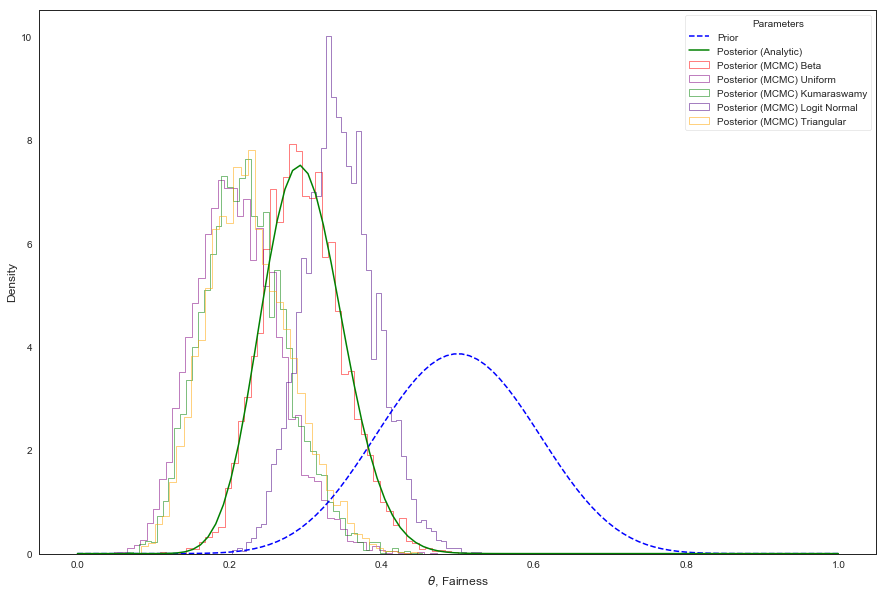

In [12]:
plt.figure(figsize=(15,10))
# Plot the posterior histogram from MCMC analysis
bins=50
plt.hist(
    trace["theta0"], bins, 
    histtype="step", density=True, 
    label="Posterior (MCMC) Beta", color="red"
)

plt.hist(
    trace["theta1"], bins, 
    histtype="step", density=True, 
    label="Posterior (MCMC) Uniform", color="purple"
)

plt.hist(
    trace["theta2"], bins, 
    histtype="step", density=True, 
    label="Posterior (MCMC) Kumaraswamy", color="green"
)

plt.hist(
    trace["theta3"], bins, 
    histtype="step", density=True, 
    label="Posterior (MCMC) Logit Normal", color="indigo"
)

plt.hist(
    trace["theta4"], bins, 
    histtype="step", density=True, 
    label="Posterior (MCMC) Triangular", color="orange"
)

# Plot the analytic prior and posterior beta distributions
x = np.linspace(0, 1, 100)
plt.plot(
    x, stats.beta.pdf(x, alpha, beta), 
    "--", label="Prior", color="blue"
)
plt.plot(
    x, stats.beta.pdf(x, alpha_post, beta_post), 
    label='Posterior (Analytic)', color="green"
)

# Update the graph labels
plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.show()